# 1.Prosper Loan Data Exploration

## 1.1 Premilinary Wrangling

#### Structure of dataset
The Prosper loan dataset comprises of 113937 loan entries with 81
attributes on each loan, including loan amount, borrower rate (or
interest rate), current loan status, borrower income, and many others,
from the year 2009-2014.

In [2]:
#importing python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#Loading the dataset
originalloan=pd.read_csv('prosperLoanData.csv')
loan_raw=originalloan.copy()

In [4]:
#overseeing datasets shapes and description
print(loan_raw.shape)
print(loan_raw.dtypes)

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


In [5]:
print(loan_raw.columns)
print(loan_raw.head())

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

#### 1.1 Data Wrangling and Visualization

There are some data cleaning,visualization and wrangling that would be carried out on the dataset to provide useful insight on the Prosper Loan Dataset

###### 1.Dataset Consists of too many columns that are not relevant for this analysis.

Only relevant Columns would be Selected for our Analysis

In [6]:
#subsetting the data
selected_columns=['LoanOriginalAmount','LoanOriginationDate','EmploymentStatus', 'IncomeRange','StatedMonthlyIncome', 'LoanStatus','Term','CreditGrade',  'BorrowerAPR', 'BorrowerRate','ProsperRating (numeric)', 'ProsperRating (Alpha)','ProsperScore', 'ListingCategory (numeric)', 'BorrowerState','Occupation',  'EmploymentStatusDuration','DebtToIncomeRatio', 'TotalProsperLoans','TotalProsperPaymentsBilled', 'OnTimeProsperPayments','ProsperPrincipalBorrowed','MonthlyLoanPayment']

In [7]:
#Creating new relevant columns
loan=loan_raw[selected_columns]

In [8]:
#View columns in new dataset to make sure change has been effected
loan.columns

Index(['LoanOriginalAmount', 'LoanOriginationDate', 'EmploymentStatus',
       'IncomeRange', 'StatedMonthlyIncome', 'LoanStatus', 'Term',
       'CreditGrade', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
       'BorrowerState', 'Occupation', 'EmploymentStatusDuration',
       'DebtToIncomeRatio', 'TotalProsperLoans', 'TotalProsperPaymentsBilled',
       'OnTimeProsperPayments', 'ProsperPrincipalBorrowed',
       'MonthlyLoanPayment'],
      dtype='object')

In [9]:
#Checking information on new dataset
print(loan.shape)
print(loan.info())

(113937, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   LoanOriginalAmount          113937 non-null  int64  
 1   LoanOriginationDate         113937 non-null  object 
 2   EmploymentStatus            111682 non-null  object 
 3   IncomeRange                 113937 non-null  object 
 4   StatedMonthlyIncome         113937 non-null  float64
 5   LoanStatus                  113937 non-null  object 
 6   Term                        113937 non-null  int64  
 7   CreditGrade                 28953 non-null   object 
 8   BorrowerAPR                 113912 non-null  float64
 9   BorrowerRate                113937 non-null  float64
 10  ProsperRating (numeric)     84853 non-null   float64
 11  ProsperRating (Alpha)       84853 non-null   object 
 12  ProsperScore                84853 non-null   float64
 13  L

In [10]:
#Converting date column into datetime type
loan['LoanOriginationDate']=pd.to_datetime(loan['LoanOriginationDate'])

C:\Users\yusuf\AppData\Local\Temp\ipykernel_9192\2662736449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['LoanOriginationDate']=pd.to_datetime(loan['LoanOriginationDate'])


In [11]:
#Testing to see if it has been effected
loan.LoanOriginationDate.dtype

dtype('<M8[ns]')

In [12]:
#create a new year column from the LoanOriginationDate column
loan['Year']=loan['LoanOriginationDate'].dt.year

C:\Users\yusuf\AppData\Local\Temp\ipykernel_9192\1761893936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['Year']=loan['LoanOriginationDate'].dt.year


In [13]:
#Grouping variables into categorical and numerical columns to create ease of differentiating 
numericalvar=loan.select_dtypes(include=['int','float'])
categoricalvar=loan.select_dtypes(include='object')
timevar=loan.LoanOriginationDate

In [14]:
loan.Year.sample(2)

78133    2007
79824    2012
Name: Year, dtype: int64

In [15]:
numericalvar.columns

Index(['LoanOriginalAmount', 'StatedMonthlyIncome', 'Term', 'BorrowerAPR',
       'BorrowerRate', 'ProsperRating (numeric)', 'ProsperScore',
       'ListingCategory (numeric)', 'EmploymentStatusDuration',
       'DebtToIncomeRatio', 'TotalProsperLoans', 'TotalProsperPaymentsBilled',
       'OnTimeProsperPayments', 'ProsperPrincipalBorrowed',
       'MonthlyLoanPayment', 'Year'],
      dtype='object')

In [16]:
categoricalvar.columns

Index(['EmploymentStatus', 'IncomeRange', 'LoanStatus', 'CreditGrade',
       'ProsperRating (Alpha)', 'BorrowerState', 'Occupation'],
      dtype='object')

##### 1.1.2 What is/are the main feature(s) of interest in your dataset?
I'm most interested in figureing out what features are most common,closely related to one another and that which is best for predicting the borrower's Annual Percentage Rate (APR) anfor the loan

#### 1.1.3 What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I hope to find which categorical variable are most common for in the loan dataset and how closely related some of them are related to one another.
I also expect that the total loan amount will have be negatively correlated to the APR of the loan i.e the
larger the total loan amount, the lower the APR. I also think that the borrowers stated
monthly income, loan term, Prosper rating, employment status will also have effects on the
APR.

#### 1.2 Univariate Exploration
I’ll start by looking at the distribution of the main variable of interest: price

##### 1.2a What are the Highest borrowerstate for Prosper Loan users

In [17]:
loan.BorrowerState.value_counts().head()

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
Name: BorrowerState, dtype: int64

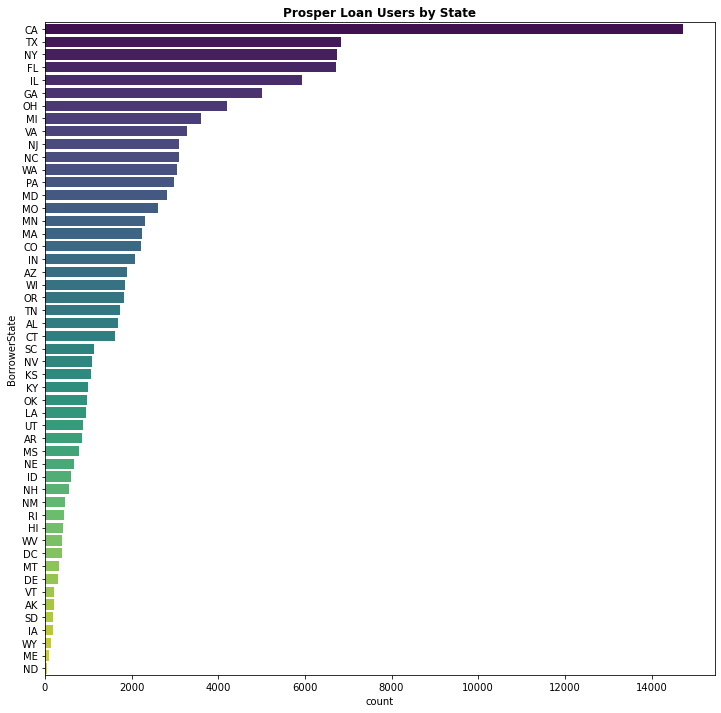

In [18]:
plt.figure(figsize=(12,12))
sns.countplot(y='BorrowerState',data=loan,order=loan.BorrowerState.value_counts().index,palette='viridis')
sns.set_context(font_scale=4)
plt.title('Prosper Loan Users by State',fontdict={'fontweight':'bold'});

In [19]:
missingdata=loan.isna().melt(value_name="missing")

In [20]:
type(categoricalvar)

pandas.core.frame.DataFrame

In [21]:
fr=loan[['EmploymentStatus', 'IncomeRange']]

In [22]:
fr.notna().sum()

EmploymentStatus    111682
IncomeRange         113937
dtype: int64

In [23]:
categoricalvar.notna().melt(value_name="missing").head(2)

,variable,missing
0,EmploymentStatus,True
1,EmploymentStatus,True


In [24]:
missingdata.head(2)

,variable,missing
0,LoanOriginalAmount,False
1,LoanOriginalAmount,False


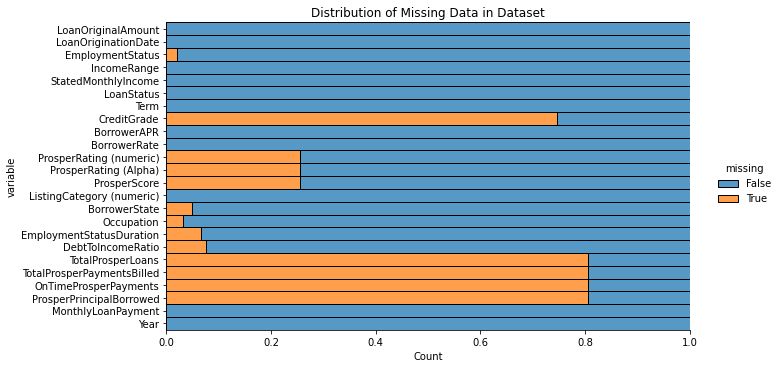

In [25]:
#Checking the distribution of missing data in each column in the data set
sns.displot(data=missingdata,y="variable",hue="missing",multiple='fill',aspect=2);
plt.title('Distribution of Missing Data in Dataset');


We have alot of missing data in the TotalProsperLoans,TotalProsperPaymentsbilled,OnTimeProsperPayments ProsperPrincipalBorrowed,Credit Grade.However, other columns contains few to no null values

In [26]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   LoanOriginalAmount          113937 non-null  int64         
 1   LoanOriginationDate         113937 non-null  datetime64[ns]
 2   EmploymentStatus            111682 non-null  object        
 3   IncomeRange                 113937 non-null  object        
 4   StatedMonthlyIncome         113937 non-null  float64       
 5   LoanStatus                  113937 non-null  object        
 6   Term                        113937 non-null  int64         
 7   CreditGrade                 28953 non-null   object        
 8   BorrowerAPR                 113912 non-null  float64       
 9   BorrowerRate                113937 non-null  float64       
 10  ProsperRating (numeric)     84853 non-null   float64       
 11  ProsperRating (Alpha)       84853 non-n

In [27]:
loan.columns

Index(['LoanOriginalAmount', 'LoanOriginationDate', 'EmploymentStatus',
       'IncomeRange', 'StatedMonthlyIncome', 'LoanStatus', 'Term',
       'CreditGrade', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
       'BorrowerState', 'Occupation', 'EmploymentStatusDuration',
       'DebtToIncomeRatio', 'TotalProsperLoans', 'TotalProsperPaymentsBilled',
       'OnTimeProsperPayments', 'ProsperPrincipalBorrowed',
       'MonthlyLoanPayment', 'Year'],
      dtype='object')

###### 1.3 Question:Whats the Employment status of those that use the ProsperLoan Services

In [28]:
Percentagep=loan.EmploymentStatus.value_counts(normalize=True)*100


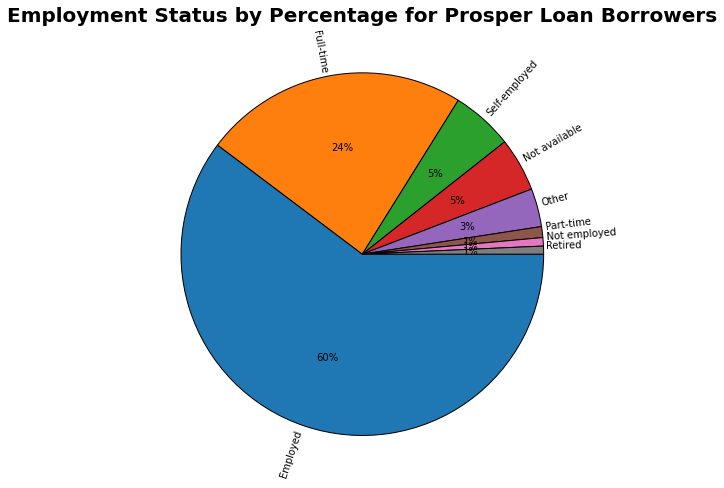

In [29]:
plt.figure(figsize=(7,7))
plt.pie(Percentagep,labels=Percentagep.index,startangle=360,counterclock=False,labeldistance=1.015,rotatelabels=True,autopct="%1.f%%",pctdistance=0.6,wedgeprops={'edgecolor':'black'})
plt.xticks(rotaion=90,)
plt.title('Employment Status by Percentage for Prosper Loan Borrowers',loc='center',fontsize=20,fontweight='bold')
plt.tight_layout()


###### Observing the frequency of each employment status of people that make use of the Prosper Loan Services.
From our observation above it goes to show that 60% of prosper loan customers are Employed,24% are employed full-time,5% are self-employed.
This goes to show that more than 90% of Prosper Loan customers are those with Employment.

In [30]:
loan.columns

Index(['LoanOriginalAmount', 'LoanOriginationDate', 'EmploymentStatus',
       'IncomeRange', 'StatedMonthlyIncome', 'LoanStatus', 'Term',
       'CreditGrade', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating (numeric)',
       'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)',
       'BorrowerState', 'Occupation', 'EmploymentStatusDuration',
       'DebtToIncomeRatio', 'TotalProsperLoans', 'TotalProsperPaymentsBilled',
       'OnTimeProsperPayments', 'ProsperPrincipalBorrowed',
       'MonthlyLoanPayment', 'Year'],
      dtype='object')

In [31]:
numericalvar.head(2)

,LoanOriginalAmount,StatedMonthlyIncome,Term,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,DebtToIncomeRatio,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPrincipalBorrowed,MonthlyLoanPayment,Year
0,9425,3083.333333,36,0.16516,0.158,NaN,NaN,0,2.0,0.17,NaN,NaN,NaN,NaN,330.43,2007
1,10000,6125.000000,36,0.12016,0.092,6.0,7.0,2,44.0,0.18,NaN,NaN,NaN,NaN,318.93,2014


In [32]:
numericalvar.sample(2)

,LoanOriginalAmount,StatedMonthlyIncome,Term,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,DebtToIncomeRatio,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPrincipalBorrowed,MonthlyLoanPayment,Year
7630,6000,2791.666667,36,0.21025,0.1734,4.0,4.0,1,79.0,0.28,1.0,7.0,7.0,6249.87,214.93,2012
11112,4000,2250.000000,36,0.17138,0.1350,5.0,5.0,7,16.0,0.12,NaN,NaN,NaN,NaN,135.74,2014


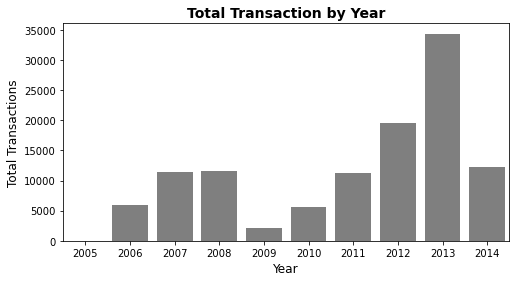

In [33]:
#Loan distribution by year
plt.figure(figsize=(8,4))
colr=sns.color_palette()[7]
sns.countplot(data=numericalvar,x='Year',color=colr)
plt.xlabel('Year',fontdict={'fontsize':12,})
plt.ylabel('Total Transactions',fontdict={'fontsize':12})
plt.title('Total Transaction by Year',fontdict={'fontsize':14,'fontweight':'bold'});

##### Observation:
    
    The year with the most transactions was in 2013 and 2012, there was a reduction in the number of transactions in 2009 and 2014,and the dataset contains informatio from 2005-2014

In [34]:
numericalvar.groupby('Year',sort='LoanOriginalAmount').sum()

,LoanOriginalAmount,StatedMonthlyIncome,Term,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,DebtToIncomeRatio,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPrincipalBorrowed,MonthlyLoanPayment
Year,,,,,,,,,,,,,,,
2005,78687,2.447083e+05,792,0.00000,2.06145,0.0,0.0,0,0.0,1.57924,0.0,0.0,0.0,0.00,2253.55
2006,28132199,2.801605e+07,212616,1184.17312,1130.31460,0.0,0.0,0,0.0,1446.25173,0.0,0.0,0.0,0.00,993720.34
2007,80787786,5.333774e+07,412560,2130.70355,2023.64570,0.0,0.0,1156,636257.0,4831.76000,473.0,4163.0,4067.0,2558754.00,2834157.39
2008,69561850,5.335769e+07,415872,2352.32623,2150.24420,0.0,0.0,33410,824044.0,2699.22000,1911.0,19688.0,19298.0,10814521.74,2423611.45
2009,8914396,1.042278e+07,73692,442.03925,394.91050,8469.0,15422.0,6528,164179.0,421.90000,1047.0,17203.0,16875.0,5261249.00,317304.05
2010,26940486,2.990197e+07,203904,1350.75971,1202.62340,21406.0,40300.0,18007,477807.0,1146.89000,2495.0,48688.0,47536.0,12033451.65,956297.66
2011,75138013,6.354577e+07,415800,2945.10263,2582.23250,39885.0,67715.0,34927,1038504.0,2491.97000,5431.0,100497.0,97162.0,27637887.40,2806481.31
2012,153175116,1.116411e+08,835260,4949.77587,4302.18740,72114.0,120386.0,94455,1921126.0,4613.22000,7743.0,120057.0,115768.0,44208629.57,5122472.02
2013,362170278,2.114441e+08,1550700,7348.18850,6303.50090,146235.0,188091.0,97630,3832980.0,8506.59000,10290.0,163585.0,159347.0,69630673.57,11176583.56



###### Distribution of important numerical columns in the dataset

Start by looking at the distribution of the BorrowerAPR values

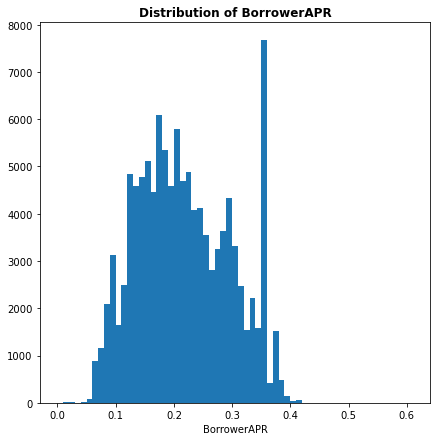

In [35]:
plt.figure(figsize=(7,7))
bins=np.arange(0,numericalvar.BorrowerAPR.max()+0.1,0.01)
plt.hist(data=numericalvar,x='BorrowerAPR',bins=bins)
plt.xlabel('BorrowerAPR')
plt.title(('Distribution of BorrowerAPR'),fontweight='bold');


#### Observation from Borrower APR distribution
Their is a slight peak between 0.35 and 0.37 APR.Only very few loans have APR less than 0.5 and greater than 0.4

In [36]:
numericalvar.LoanOriginalAmount.value_counts().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 4000     14333
15000    12407
10000    11106
5000      6990
2000      6067
         ...  
5284         1
7936         1
1201         1
10593        1
4292         1
Name: LoanOriginalAmount, Length: 2468, dtype: int64>

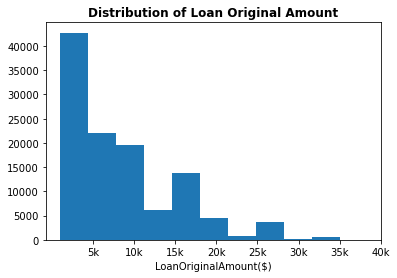

In [37]:
plt.hist(data=numericalvar,x='LoanOriginalAmount')
plt.xlabel('LoanOriginalAmount($)')
plt.xticks([5000,10000,15000,20000,25000,30000,35000,40000],['5k','10k','15k','20k','25k','30k','35k','40k'])
plt.title('Distribution of Loan Original Amount',fontdict={'fontweight':'bold'});

Most of the Loans collected are less than 5,000 dollars and there is a sharp decline for loan amounts within the range of 20,000, to 25,000, and  30,000 and above

In [38]:
#checking columns in categorical variable dataframe
categoricalvar.columns

Index(['EmploymentStatus', 'IncomeRange', 'LoanStatus', 'CreditGrade',
       'ProsperRating (Alpha)', 'BorrowerState', 'Occupation'],
      dtype='object')

In [39]:
numericalvar['ProsperRating (numeric)'].value_counts()

4.0    18345
5.0    15581
6.0    14551
3.0    14274
2.0     9795
1.0     6935
7.0     5372
Name: ProsperRating (numeric), dtype: int64

In [40]:
numericalvar.head(1)

,LoanOriginalAmount,StatedMonthlyIncome,Term,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,DebtToIncomeRatio,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPrincipalBorrowed,MonthlyLoanPayment,Year
0,9425,3083.333333,36,0.16516,0.158,NaN,NaN,0,2.0,0.17,NaN,NaN,NaN,NaN,330.43,2007


In [41]:
categoricalvar.sample(1)

,EmploymentStatus,IncomeRange,LoanStatus,CreditGrade,ProsperRating (Alpha),BorrowerState,Occupation
76385,Employed,"$50,000-74,999",Completed,NaN,E,CA,Skilled Labor


In [42]:
list(loan.IncomeRange.value_counts().index)

['$25,000-49,999',
 '$50,000-74,999',
 '$100,000+',
 '$75,000-99,999',
 'Not displayed',
 '$1-24,999',
 'Not employed',
 '$0']

In [43]:
incomeRange=['Not employed','Not displayed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
incomesort=pd.api.types.CategoricalDtype(categories=incomeRange,ordered=True)
loan['IncomeRange']=loan['IncomeRange'].astype(incomesort)

C:\Users\yusuf\AppData\Local\Temp\ipykernel_9192\3247738483.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['IncomeRange']=loan['IncomeRange'].astype(incomesort)


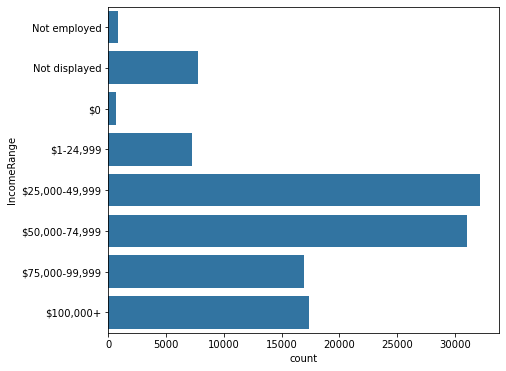

In [44]:
plt.figure(figsize=(7,6))
pal1=sns.color_palette()[0]
sns.countplot(y='IncomeRange',data=categoricalvar,color=pal1,order=incomeRange);


From the Bar chart above it goes to show the frequency at which Loan is taken by people with different income range. People that earn 20,000 dollars to 49,999 are the highest loan takers.

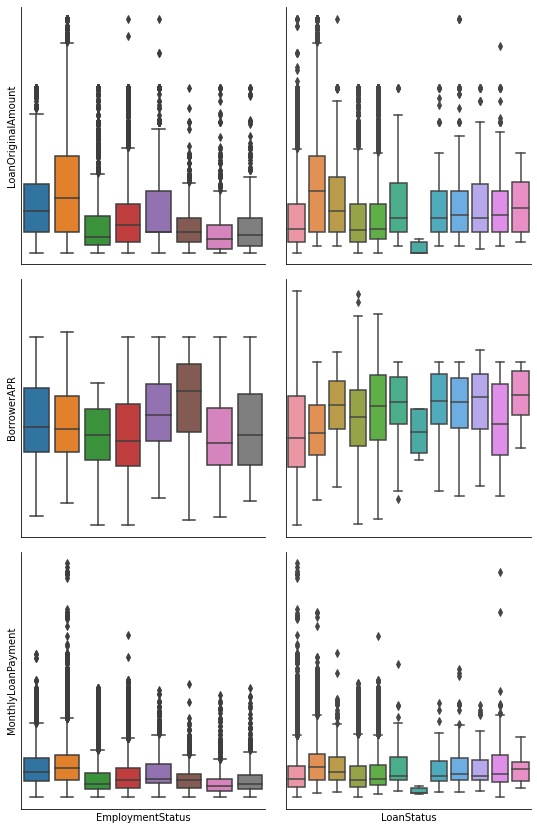

In [45]:
cat=sns.PairGrid(x_vars=['EmploymentStatus', 'LoanStatus'],y_vars=['LoanOriginalAmount','BorrowerAPR','MonthlyLoanPayment'],data=loan,height=4,)
cat.map(sns.boxplot,)
plt.setp(cat.axes,xticks=[],yticks=[]);

C:\Users\yusuf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\yusuf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\yusuf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\yusuf\anacond

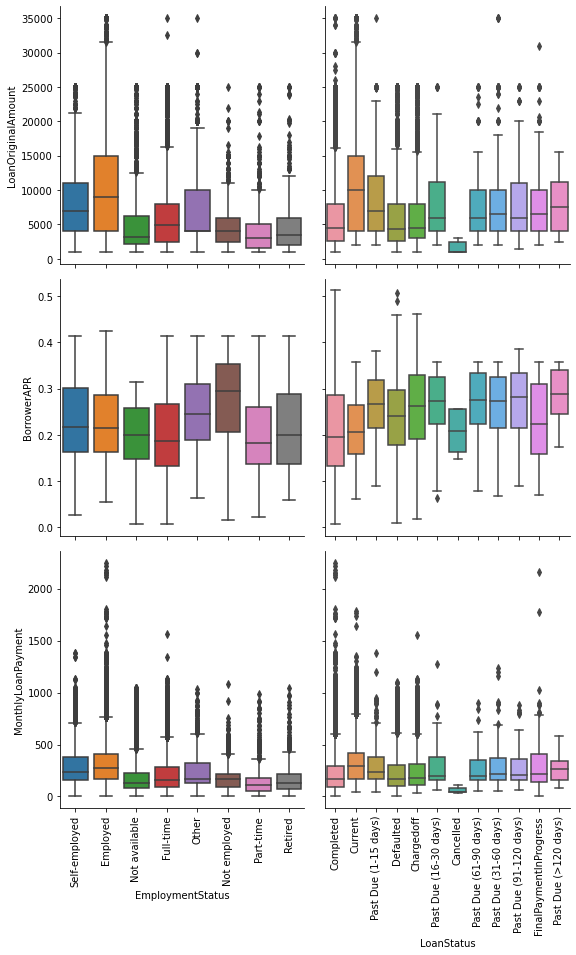

In [46]:
def boxin(x,y,**kwargs):
    sns.boxplot(x,y)
    plt.xticks(rotation=90);


cat=sns.PairGrid(x_vars=['EmploymentStatus', 'LoanStatus'],y_vars=['LoanOriginalAmount','BorrowerAPR','MonthlyLoanPayment'],data=loan,height=4,)
cat.map(boxin);
#plt.setp(cat.axes,xticks=[],yticks=[])

In [47]:
categoricalvar.columns

Index(['EmploymentStatus', 'IncomeRange', 'LoanStatus', 'CreditGrade',
       'ProsperRating (Alpha)', 'BorrowerState', 'Occupation'],
      dtype='object')

In [48]:
categoricalvar['ProsperRating (Alpha)'].unique()

array([nan, 'A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

In [49]:
ratingorder=['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ratin=pd.api.types.CategoricalDtype(ordered=True,categories=ratingorder)

In [50]:
categoricalvar['ProsperRating (Alpha)']=categoricalvar['ProsperRating (Alpha)'].astype(ratin)

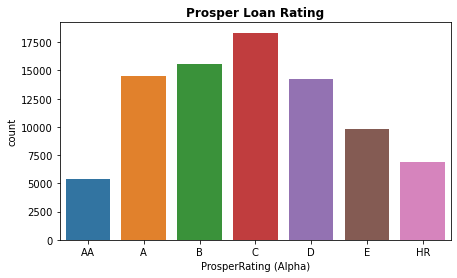

In [51]:
plt.figure(figsize=(7,4))
sns.countplot(x='ProsperRating (Alpha)',data=categoricalvar,order=ratingorder)
plt.title('Prosper Loan Rating',fontdict={'fontweight':'bold'});


In [52]:
categoricalvar['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

##### PART 2:
    Comparing Patterns and Relationship between variables

In [53]:
numericalvar.columns,categoricalvar.columns

(Index(['LoanOriginalAmount', 'StatedMonthlyIncome', 'Term', 'BorrowerAPR',
        'BorrowerRate', 'ProsperRating (numeric)', 'ProsperScore',
        'ListingCategory (numeric)', 'EmploymentStatusDuration',
        'DebtToIncomeRatio', 'TotalProsperLoans', 'TotalProsperPaymentsBilled',
        'OnTimeProsperPayments', 'ProsperPrincipalBorrowed',
        'MonthlyLoanPayment', 'Year'],
       dtype='object'),
 Index(['EmploymentStatus', 'IncomeRange', 'LoanStatus', 'CreditGrade',
        'ProsperRating (Alpha)', 'BorrowerState', 'Occupation'],
       dtype='object'))

In [54]:
#Checking for relationship between some selected numerical columns
myvar=['LoanOriginalAmount', 'BorrowerAPR','BorrowerRate', 'ProsperRating (numeric)', 'ProsperScore','ListingCategory (numeric)','DebtToIncomeRatio', 'OnTimeProsperPayments', 'Year','StatedMonthlyIncome']

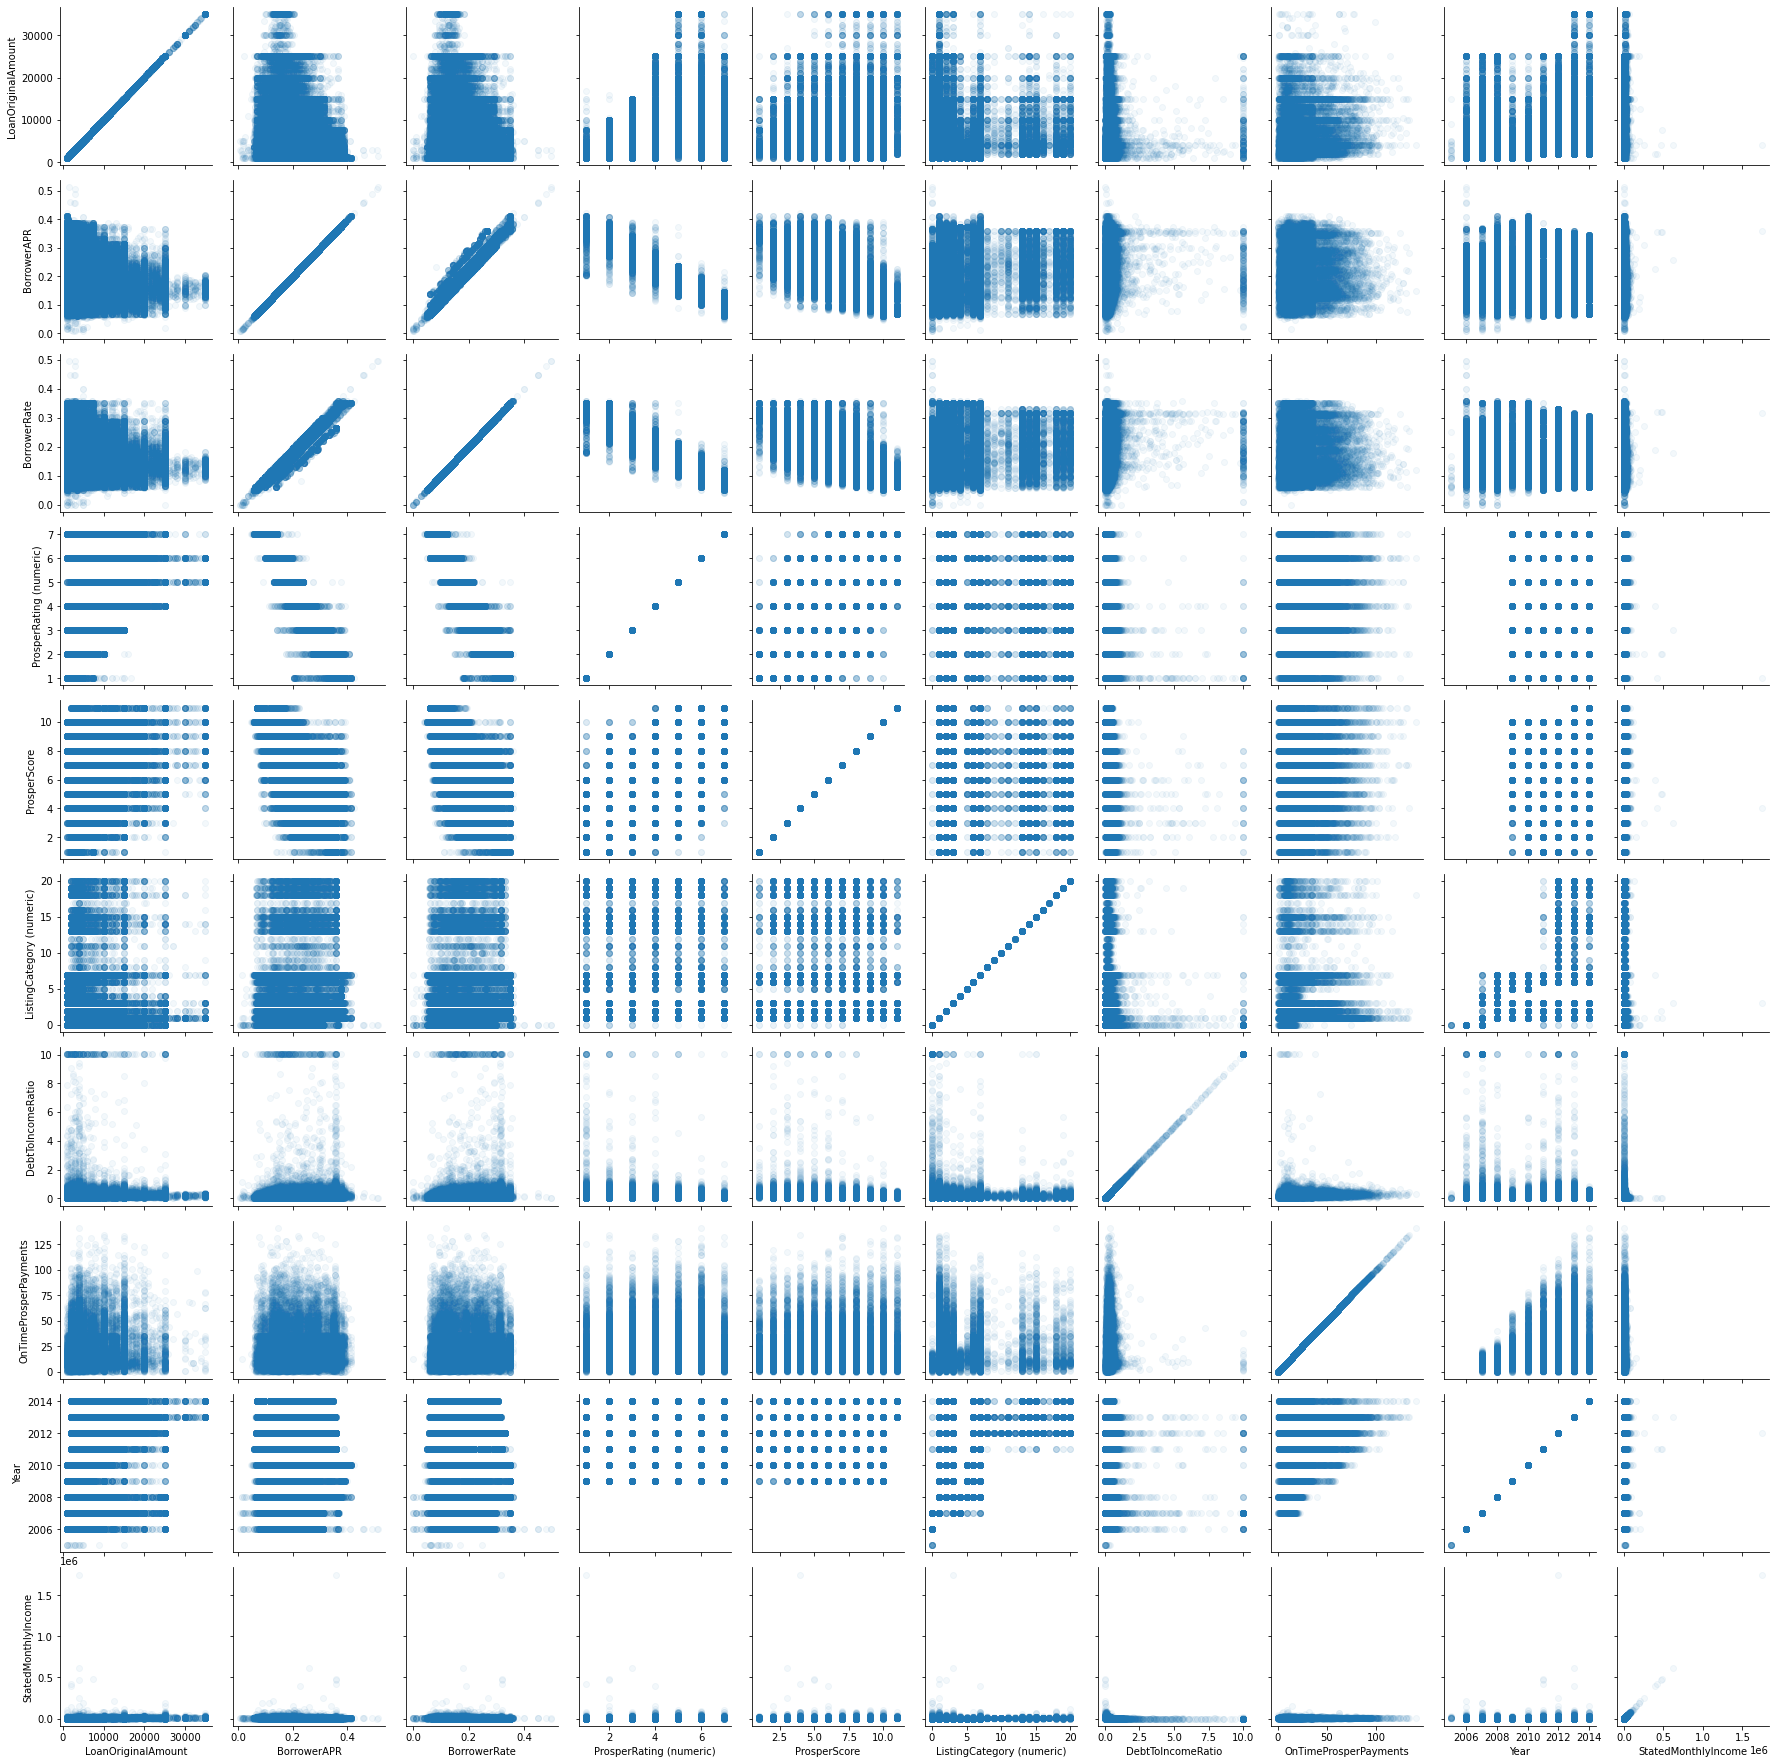

In [55]:
k=sns.PairGrid(vars=myvar,data=numericalvar)
k.map(plt.scatter,alpha=1/20);

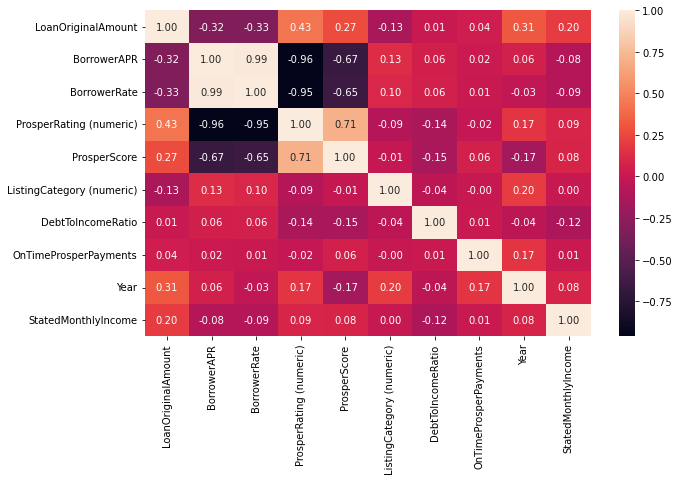

In [56]:
plt.figure(figsize=(10,6))
sns.heatmap(loan[myvar].corr(),annot=True,fmt='.2f');

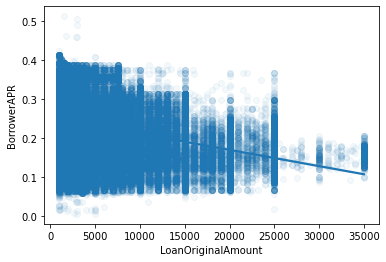

In [57]:
sns.regplot(y='BorrowerAPR',x='LoanOriginalAmount',data=loan,scatter_kws={'alpha':1/20});

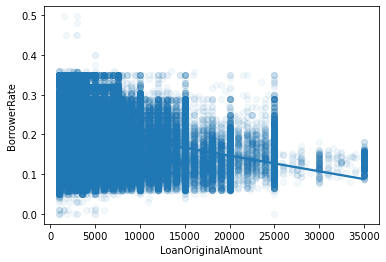

In [58]:
sns.regplot(y='BorrowerRate',x='LoanOriginalAmount',data=loan,scatter_kws={'alpha':1/20});

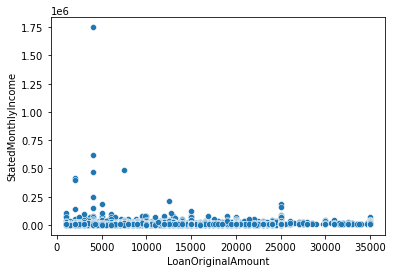

In [59]:
sns.scatterplot(y='StatedMonthlyIncome',x='LoanOriginalAmount',data=loan,);

###### The correlation coefficient of borrower APR and loan original amount is -0.32,
the regplot also shows that these two variables are negatively correlated, which agrees with our
hypothesis, which means that the more the loan amount, the lower the APR. 
###### The Borrower Rate is also negatively Correlated with the LoanOriginal Amount
There is a negative correlation between the LoanOriginalAmount and BorrowerAPR according to the plot above the Borrower APR increases as the LoanOriginalAmount decreases.



###### The state monthly income is however positively correlated with the Loan Original Amount
The loan original amount is positively correlated with the stated monthly income, it makes sense since borrowers
with more monthly income could loan more money.

In [60]:
categoricalvar.columns,numericalvar.columns

(Index(['EmploymentStatus', 'IncomeRange', 'LoanStatus', 'CreditGrade',
        'ProsperRating (Alpha)', 'BorrowerState', 'Occupation'],
       dtype='object'),
 Index(['LoanOriginalAmount', 'StatedMonthlyIncome', 'Term', 'BorrowerAPR',
        'BorrowerRate', 'ProsperRating (numeric)', 'ProsperScore',
        'ListingCategory (numeric)', 'EmploymentStatusDuration',
        'DebtToIncomeRatio', 'TotalProsperLoans', 'TotalProsperPaymentsBilled',
        'OnTimeProsperPayments', 'ProsperPrincipalBorrowed',
        'MonthlyLoanPayment', 'Year'],
       dtype='object'))

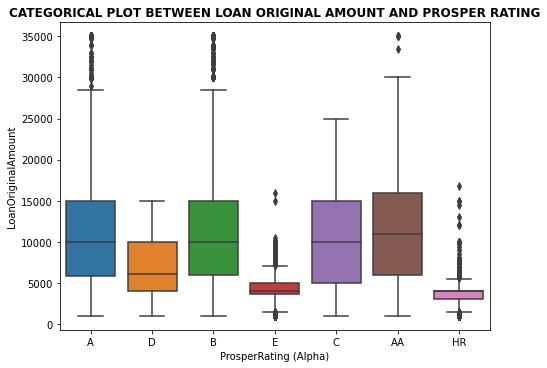

In [61]:
plt.figure(figsize=(7,5))
sns.boxplot(x='ProsperRating (Alpha)',y='LoanOriginalAmount',data=loan)
plt.tight_layout()
plt.title('CATEGORICAL PLOT BETWEEN LOAN ORIGINAL AMOUNT AND PROSPER RATING',fontdict={'fontweight':'bold'});

##### Which Occupation has the highest Loan amount.

Text(0.5, 1.0, 'Loan Amount on Occupation by Average')

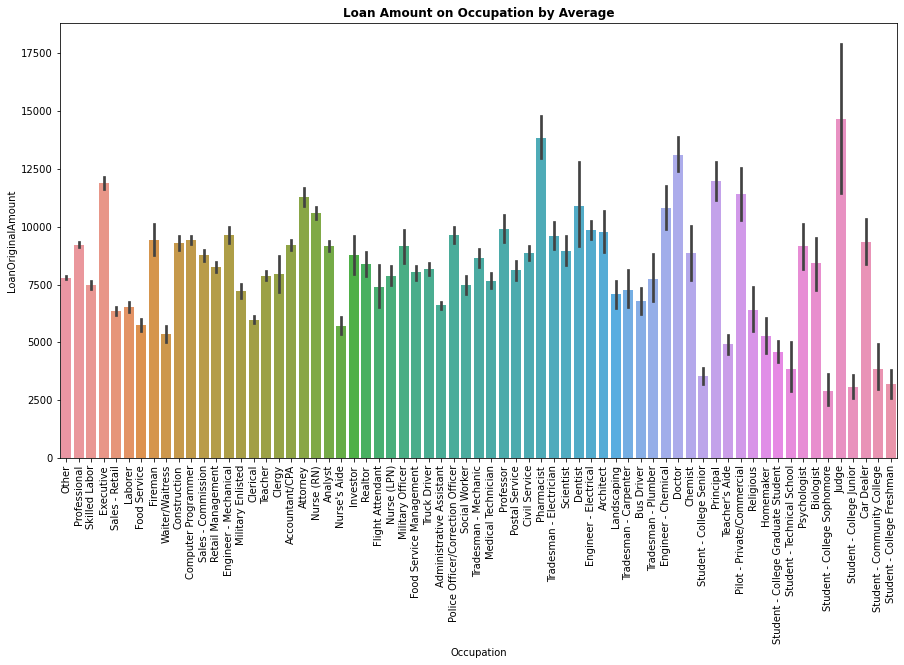

In [62]:
plt.figure(figsize=(15,8))
sns.barplot(y='LoanOriginalAmount',x='Occupation',data=loan)
plt.xticks(rotation=90)
plt.title('Loan Amount on Occupation by Average',fontdict={'fontweight':'bold'})

###### The occupation with the highest Loan average amount are Judges,Pharmacist,Doctors,Principal and Executive.Below is a detailed table of the numerical values of the top 5.

In [63]:
loan.groupby('Occupation')['LoanOriginalAmount'].mean().reset_index().sort_values('LoanOriginalAmount',ascending=False).head(5)

,Occupation,LoanOriginalAmount
26,Judge,14654.545455
36,Pharmacist,13853.766537
15,Doctor,13115.649798
40,Principal,11976.522436
19,Executive,11890.576664


In [64]:
categoricalvar.head(2),numericalvar.head(2)

(  EmploymentStatus     IncomeRange LoanStatus CreditGrade  \
 0    Self-employed  $25,000-49,999  Completed           C   
 1         Employed  $50,000-74,999    Current         NaN   
 
   ProsperRating (Alpha) BorrowerState    Occupation  
 0                   NaN            CO         Other  
 1                     A            CO  Professional  ,
    LoanOriginalAmount  StatedMonthlyIncome  Term  BorrowerAPR  BorrowerRate  \
 0                9425          3083.333333    36      0.16516         0.158   
 1               10000          6125.000000    36      0.12016         0.092   
 
    ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  \
 0                      NaN           NaN                          0   
 1                      6.0           7.0                          2   
 
    EmploymentStatusDuration  DebtToIncomeRatio  TotalProsperLoans  \
 0                       2.0               0.17                NaN   
 1                      44.0               0.1

A boxplot is used to study the bivariate relationship between BorrowerAPR and CreditGrade and we found that C creditgrade has the highest outliers.


C:\Users\yusuf\anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 1080x864 with 0 Axes>

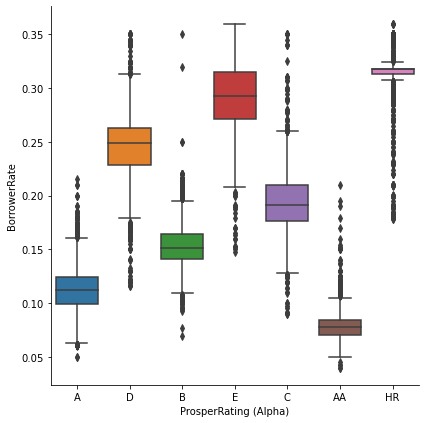

In [65]:
plt.figure(figsize=(15,12))
plotin=sns.PairGrid(x_vars=['ProsperRating (Alpha)'],y_vars='BorrowerRate',data=loan,size=6,aspect=1)
plotin.map(sns.boxplot)

In [66]:
categoricalvar.columns,numericalvar.columns


(Index(['EmploymentStatus', 'IncomeRange', 'LoanStatus', 'CreditGrade',
        'ProsperRating (Alpha)', 'BorrowerState', 'Occupation'],
       dtype='object'),
 Index(['LoanOriginalAmount', 'StatedMonthlyIncome', 'Term', 'BorrowerAPR',
        'BorrowerRate', 'ProsperRating (numeric)', 'ProsperScore',
        'ListingCategory (numeric)', 'EmploymentStatusDuration',
        'DebtToIncomeRatio', 'TotalProsperLoans', 'TotalProsperPaymentsBilled',
        'OnTimeProsperPayments', 'ProsperPrincipalBorrowed',
        'MonthlyLoanPayment', 'Year'],
       dtype='object'))

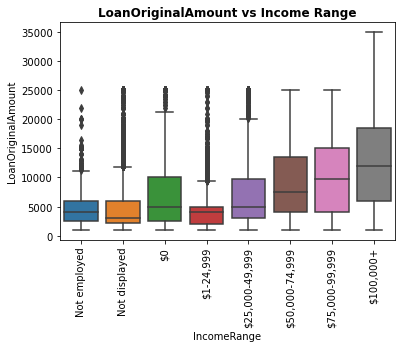

In [70]:
sns.boxplot(x='IncomeRange',y='LoanOriginalAmount',data=loan)
plt.xticks(rotation=90)
plt.title('LoanOriginalAmount vs Income Range',fontweight='bold');

###### In  the Bivariate relationship plotted above.
The income range of 1–24,000 has maximum outliers.For income rangeof 50,000 , the loan amount range is also
high. However, these ranges do not seem to have any unusual observation/outliers.

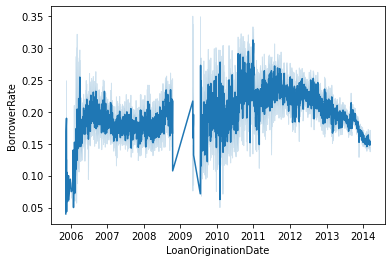

In [71]:
sns.lineplot(x='LoanOriginationDate',y='BorrowerRate',data=loan);

###### From the TimeSeries plot above it shows that Interest Rates have increased Over time

In [72]:
list(loan.columns)

['LoanOriginalAmount',
 'LoanOriginationDate',
 'EmploymentStatus',
 'IncomeRange',
 'StatedMonthlyIncome',
 'LoanStatus',
 'Term',
 'CreditGrade',
 'BorrowerAPR',
 'BorrowerRate',
 'ProsperRating (numeric)',
 'ProsperRating (Alpha)',
 'ProsperScore',
 'ListingCategory (numeric)',
 'BorrowerState',
 'Occupation',
 'EmploymentStatusDuration',
 'DebtToIncomeRatio',
 'TotalProsperLoans',
 'TotalProsperPaymentsBilled',
 'OnTimeProsperPayments',
 'ProsperPrincipalBorrowed',
 'MonthlyLoanPayment',
 'Year']

C:\Users\yusuf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\yusuf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


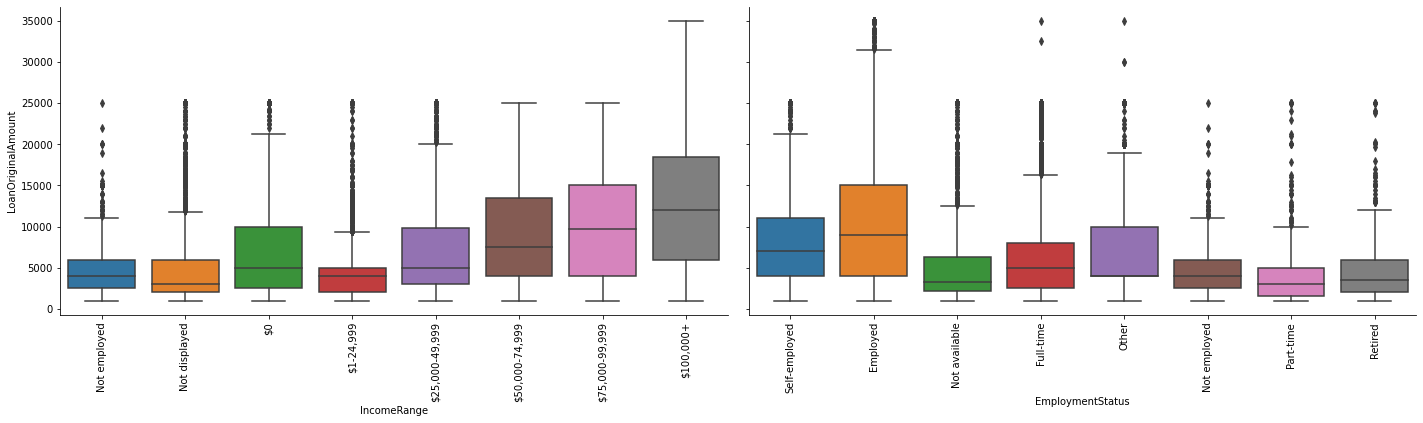

In [84]:
def bx(x,y,**kwargs):
    sns.boxplot(x,y)
    plt.xticks(rotation=90)
  
cat=sns.PairGrid(x_vars=['IncomeRange','EmploymentStatus'],y_vars=['LoanOriginalAmount'],data=loan,height=5,aspect=2)
cat.map(bx);